In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

# 13. Условная оптимизация

Задачей условной оптимизации называют поиск минимума (или максимума) фнукции $n$ переменных при ограничениях. Например, требуется минимизировать
$$
f(x) = -(2xy + 2x - x^2 -2y^2)
$$
при ограничениях
$$
\left\{
\begin{array}{l}
x^3 - y = 0 \\
y - (x-1)^4 - 2 \ge 0
\end{array}
\right.
$$
и
$$
\left\{
\begin{array}{l}
0.5 \le x \le 1.5 \\
1.5 \le y \le 2.5
\end{array}
\right.
$$


Задачи условной минимизации можно решать с помощью функции `minimize` модуля `optimize`

In [34]:
from scipy.optimize import minimize

Необходимо создать функцию, вычисляющую целевую функцию:

In [3]:
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

Также необходимо задать ограничения. Ограничения задаются в списке словарей. Каждый элемент этого списка - это словарь со следующими полями:
* `'type'` - тип ограничения: `'eq'` - в форме уравнения (равенства), `'ineq'` - в форме неравенства;
* `'fun'` - функция, вычисляющая левую часть ограничения;
* `'jac'` - якобиан (для одного ограничения - градиент) для левой части ограничения (можно опустить).

Вот здесь задаем ограничения "статически":

In [4]:
cons = [{'type': 'eq',
         'fun' : lambda x: x[0]**3 - x[1],
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: x[1] - (x[0]-1)**4 - 2}]

Вот здесь добавляем ограничения с помощью append():

In [36]:
#cons = []
#cons.append({'type': 'eq',
#         'fun' : lambda x: x[0]**3 - x[1],
#         'jac' : lambda x: [3.0*(x[0]**2.0), -1.0]})
#cons.append({'type': 'ineq',
#         'fun' : lambda x: x[1] - (x[0]-1)**4 - 2})

In [37]:
#cons = {'type': 'ineq',
#        'fun' : lambda x: [-x[0]**3 + x[1], x[1] - (x[0]-1)**4 - 2]}

Еще определяем границы:

In [26]:
bnds = [[0.5, 1.5], [1.5, 2.5]]

Начальная точка:

In [38]:
x0 = [0, 2.5]

Теперь запустим метод `minimize`. Вначале без ограничений:

In [40]:
resu = minimize(f, x0)
resu

      fun: -1.9999999999996365
 hess_inv: array([[0.99829115, 0.50105608],
       [0.50105608, 0.4993548 ]])
      jac: array([ 1.25169754e-06, -1.41561031e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([2.00000043, 0.99999985])

А теперь с ограничениями:

In [42]:
resc = minimize(f, x0, bounds=bnds, constraints=cons)
resc

     fun: 2.049915472091582
     jac: array([-3.48747873,  5.49674428])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.26089314, 2.00463288])

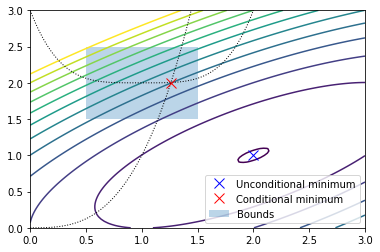

In [48]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99, 10, 1));
plt.plot(x, x**3, 'b:', linewidth=1, labe)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.plot(resu.x[0], resu.x[1], 'x', markersize=10, color='blue', label='Unconditional minimum')
plt.plot(resc.x[0], resc.x[1], 'x', markersize=10, color='red', label='Conditional minimum')
plt.fill([bnds[0][0], bnds[0][1], bnds[0][1], bnds[0][0]], [bnds[1][0], bnds[1][0], bnds[1][1], bnds[1][1]], 
         alpha=0.3, label='Bounds')
plt.axis([0,3,0,3])
plt.legend()
pass